In [1]:
import brewer2mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Set up some better defaults for matplotlib
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [29]:
data = {"p1": "qlearning", "p2": {"Random": [.7604, .1118, .1278], \
                                    "MCTS": [.75, .05, .2],
                                  "Minimax 2": [.139, .351, .51], \
                                  "Minimax 4": [0, .4, .6]}}

In [30]:
order = ["Random", "MCTS", "Minimax 2", "Minimax 4"]

In [31]:
win = [data["p2"][learner][0] for learner in order]
draw = [data["p2"][learner][1] for learner in order]
loss = [data["p2"][learner][2] for learner in order]

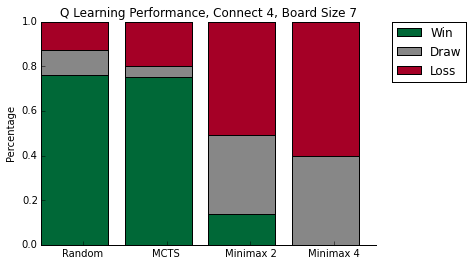

In [32]:
red, gray, green = '#a50026', '#878787', '#006837'

plt.bar([0, 1, 2, 3], win, color=green, label='Win')
plt.bar([0, 1, 2, 3], draw, color=gray, label='Draw', bottom = win)
plt.bar([0, 1, 2, 3], loss, color=red, label='Loss', bottom = [draw[i] + win[i] for i in range(0, len(draw))])
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Random', 'MCTS', 'Minimax 2', 'Minimax 4'], rotation='horizontal')
plt.ylabel("Percentage")
plt.xlabel("")
plt.title("Q Learning Performance, Connect 4, Board Size 7")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
remove_border()
plt.show()


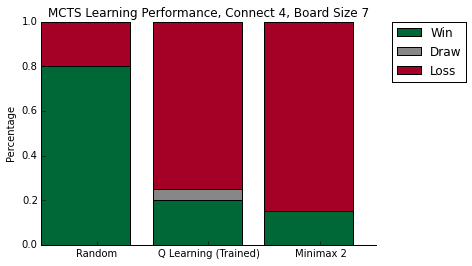

In [37]:
# MCTS plot
data = {"p1": "MCTS", "p2": {"Random": [.8, 0, .2], \
                                    "Q_Learning": [.2, .05, .75],
                                  "Minimax 2": [.15, 0, .85]}}

order = ["Random", "Q_Learning", "Minimax 2"]

win = [data["p2"][learner][0] for learner in order]
draw = [data["p2"][learner][1] for learner in order]
loss = [data["p2"][learner][2] for learner in order]

red, gray, green = '#a50026', '#878787', '#006837'

plt.bar([0, 1, 2], win, color=green, label='Win')
plt.bar([0, 1, 2], draw, color=gray, label='Draw', bottom = win)
plt.bar([0, 1, 2], loss, color=red, label='Loss', bottom = [draw[i] + win[i] for i in range(0, len(draw))])
plt.xticks([0.5, 1.5, 2.5], ['Random', 'Q Learning (Trained)', 'Minimax 2'], rotation='horizontal')
plt.ylabel("Percentage")
plt.xlabel("")
plt.title("MCTS Learning Performance, Connect 4, Board Size 7")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
remove_border()
plt.show()
